# Example 2: Heuristic hyperparameters

We will use heuristic parameters to infer the posterior log-rate from an example dataset. The period of the grid can be inferred reasonably well from the radial autocorrelogram. The height of the kernel, reflecting the overall prior variance (uncertainty), is more difficult to infer. This heuristic estiamte of the prior variance is suitable for finding the locations of grid fields, but one should optimize it using the evidence lower bound (example 3) in order to get an interpretable posterior.

Neuron `r2405_051216b_cell1816` was recorded by Dr. Marius Bauza and the Krupic lab; They have kindly shared this data to evaluate these GP methods. Please cite their work as

> Krupic J, Bauza M, Burton S, O’Keefe J. Local transformations of the hippocampal cognitive map. Science. 2018 Mar 9;359(6380):1143-6.

({1: <Axes: title={'center': 'Rate histogram'}>,
  2: <Axes: title={'center': 'Log-Rate (minus background)'}>,
  3: <Axes: title={'center': 'Mean Rate'}>,
  4: <Axes: title={'center': 'Marginal c.v. of λ (σ/μ)'}>},
 {1: <Axes: >, 3: <Axes: >, 2: <Axes: >, 4: <Axes: >})

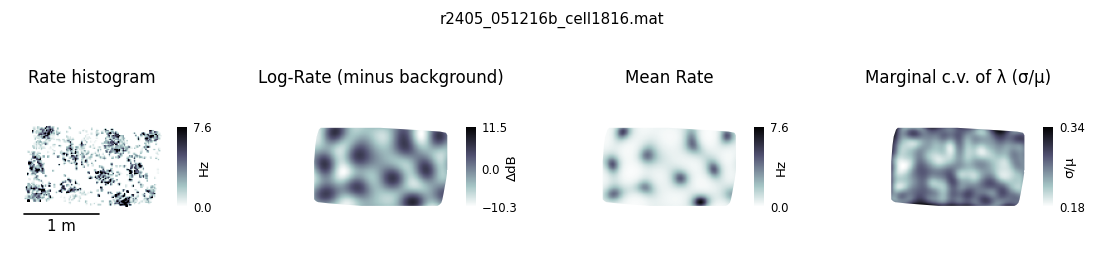

In [1]:
import sys
sys.path.append('../')
from lgcpspatial.loaddata import Dataset
from lgcpspatial.lgcp2d   import lgcpregress
from lgcpspatial.plot     import inference_summary_plot

L        = 128 # Grid size for position bins
pad      = 0.1 # Edge padding (Avoids circular convolution wrap-around)
datadir  = '../example data/'
dataset  = 'r2405_051216b_cell1816.mat'

data = Dataset.from_file(datadir+dataset,pad)
data.prepare(L,doplot=False)

# LGCP inference using heuristic parameters
result = lgcpregress(data)
inference_summary_plot(result,ftitle=dataset)